In [2]:
import numpy as np
import cv2
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras.layers import BatchNormalization
from tensorflow.keras import backend as K

In [3]:
meta_file = 'meta_data.csv'
meta_data = pd.read_csv(meta_file)
meta_data.head(5)

,Unnamed: 0,uid,individual,simulation,frame,video_clip,optical,disparity,eye,head,cs_class,fms
0,0,d38405e6-24a3-43,1,BeachTeleportation,/frames/d38405e6-24a3-43/,/clip-d38405e6-24a3-43.mp4,/optic-d38405e6-24a3-43.mp4,/disp-d38405e6-24a3-43.mp4,/eye-d38405e6-24a3-43.csv,/head-d38405e6-24a3-43.csv,0,0.0
1,1,ad1ceab1-1769-44,1,BeachTeleportation,/frames/ad1ceab1-1769-44/,/clip-ad1ceab1-1769-44.mp4,/optic-ad1ceab1-1769-44.mp4,/disp-ad1ceab1-1769-44.mp4,/eye-ad1ceab1-1769-44.csv,/head-ad1ceab1-1769-44.csv,1,1.0
2,2,27b0760c-23e1-4d,1,BeachTeleportation,/frames/27b0760c-23e1-4d/,/clip-27b0760c-23e1-4d.mp4,/optic-27b0760c-23e1-4d.mp4,/disp-27b0760c-23e1-4d.mp4,/eye-27b0760c-23e1-4d.csv,/head-27b0760c-23e1-4d.csv,1,1.0
3,3,d6bf9f47-1d1c-45,1,BeachTeleportation,/frames/d6bf9f47-1d1c-45/,/clip-d6bf9f47-1d1c-45.mp4,/optic-d6bf9f47-1d1c-45.mp4,/disp-d6bf9f47-1d1c-45.mp4,/eye-d6bf9f47-1d1c-45.csv,/head-d6bf9f47-1d1c-45.csv,1,2.0
4,4,76e1681b-95ac-41,1,BeachTeleportation,/frames/76e1681b-95ac-41/,/clip-76e1681b-95ac-41.mp4,/optic-76e1681b-95ac-41.mp4,/disp-76e1681b-95ac-41.mp4,/eye-76e1681b-95ac-41.csv,/head-76e1681b-95ac-41.csv,1,1.0


In [5]:
def feature_extract(input_video):
    cap = cv2.VideoCapture(input_video)

    # Define new frame size
    new_width, new_height = 224, 224

    frames = []
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        resized_frame = cv2.resize(frame, (new_width, new_height))
        frames.append(resized_frame)

    cap.release()
    video_data = np.array(frames)
    i3d_model = InceptionV3(weights='imagenet', include_top=False)
    # Load and preprocess your video frames
    video_data_preprocessed = preprocess_input(video_data)
    # Extract features
    features = i3d_model.predict(video_data_preprocessed)
    return features

In [6]:
sample = feature_extract('Video_Clips\clips'+'/clip-d38405e6-24a3-43.mp4')



9/9 [==============================] - 2s 171ms/step


In [7]:
np.shape(sample)

(279, 5, 5, 2048)

In [8]:
len(sample)

279

In [9]:
feature_list = np.empty((0, 5, 5, 2048))
label_list = []

count = 1

for index, row in meta_data.iterrows():
    video_path = row['video_clip']
    feature_vector = feature_extract('Video_Clips\clips'+video_path)

    feature_list = np.concatenate((feature_list, feature_vector), axis=0)
    print(count)
    print(np.shape(feature_vector))
    count = count + 1

    label = row['cs_class']
    label_list.extend([label] * len(feature_vector))

labels_array = np.array(label_list)

9/9 [==============================] - 2s 168ms/step
1
(279, 5, 5, 2048)
10/10 [==============================] - 2s 159ms/step
2
(291, 5, 5, 2048)
10/10 [==============================] - 2s 161ms/step
3
(294, 5, 5, 2048)
9/9 [==============================] - 2s 172ms/step
4
(284, 5, 5, 2048)
9/9 [==============================] - 2s 165ms/step
5
(279, 5, 5, 2048)
10/10 [==============================] - 2s 155ms/step
6
(291, 5, 5, 2048)
9/9 [==============================] - 2s 165ms/step
7
(279, 5, 5, 2048)
9/9 [==============================] - 2s 169ms/step
8
(277, 5, 5, 2048)
9/9 [==============================] - 2s 166ms/step
9
(276, 5, 5, 2048)
9/9 [==============================] - 2s 165ms/step
10
(279, 5, 5, 2048)
9/9 [==============================] - 2s 163ms/step
11
(273, 5, 5, 2048)
9/9 [==============================] - 2s 172ms/step
12
(280, 5, 5, 2048)
9/9 [==============================] - 2s 166ms/step
13
(277, 5, 5, 2048)
9/9 [==============================] - 2s

KeyboardInterrupt: 

In [11]:
np.shape(feature_list)

(40720, 5, 5, 2048)

In [15]:
len(label_list)

40720

Fold 1/5
[0 0 0 ... 0 0 0]
Epoch 1/15
2036/2036 [==============================] - 33s 14ms/step - loss: 0.5099 - accuracy: 0.8020 - val_loss: 0.2837 - val_accuracy: 0.8766
Epoch 2/15
2036/2036 [==============================] - 19s 9ms/step - loss: 0.3939 - accuracy: 0.8448 - val_loss: 0.2475 - val_accuracy: 0.8835
Epoch 3/15
2036/2036 [==============================] - 20s 10ms/step - loss: 0.3772 - accuracy: 0.8471 - val_loss: 0.2245 - val_accuracy: 0.8981
Epoch 4/15
2036/2036 [==============================] - 20s 10ms/step - loss: 0.3546 - accuracy: 0.8577 - val_loss: 0.2654 - val_accuracy: 0.8809
Epoch 5/15
2036/2036 [==============================] - 19s 10ms/step - loss: 0.3220 - accuracy: 0.8693 - val_loss: 0.2011 - val_accuracy: 0.9137
Epoch 6/15
2036/2036 [==============================] - 20s 10ms/step - loss: 0.2975 - accuracy: 0.8802 - val_loss: 0.1966 - val_accuracy: 0.9163
Epoch 7/15
2036/2036 [==============================] - 30s 15ms/step - loss: 0.2860 - accuracy: 0

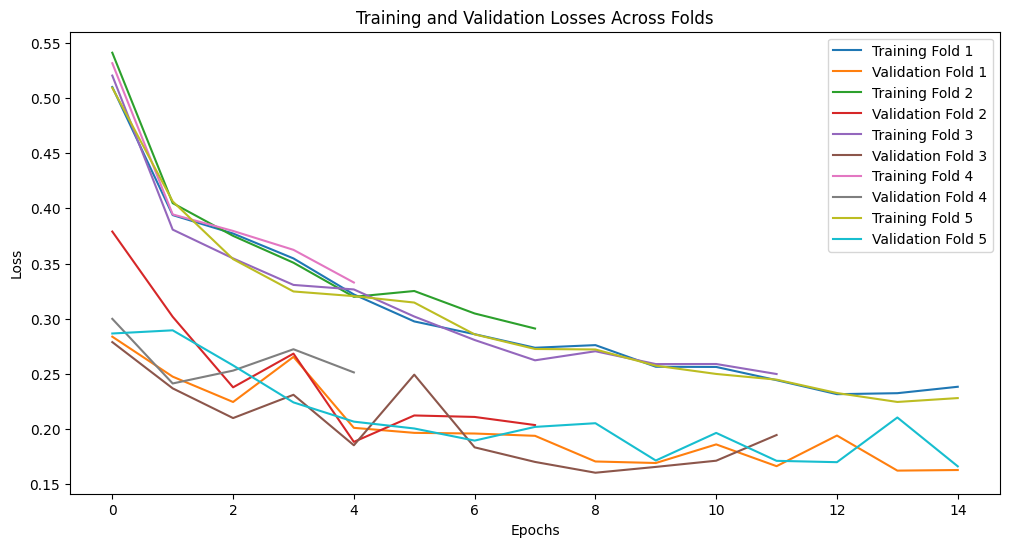

In [18]:
reshaped_feature_data = feature_list.reshape((40720, 5, 5 * 2048))

# Define the number of folds
k_folds = 5
target_data = label_list
target_data = np.array(target_data)
# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
# Initialize lists to store results
test_losses = []
train_losses = []
val_losses = []
test_accuracies = []

# Iterate over the folds
for fold, (train_indices, test_indices) in enumerate(stratified_kfold.split(reshaped_feature_data, target_data)):
    print(f'Fold {fold + 1}/{k_folds}')
    
    X_train, X_test = reshaped_feature_data[train_indices], reshaped_feature_data[test_indices]
    y_train, y_test = target_data[train_indices], target_data[test_indices]
    print(y_train)
    model = Sequential()
    model.add(LSTM(units=50, input_shape=(5, 5 * 2048), return_sequences=True))
    model.add(Dropout(0.6))
    model.add(BatchNormalization())
    model.add(LSTM(units=50))
    model.add(Dropout(0.6))
    model.add(BatchNormalization())
    model.add(Dense(units=4, activation='softmax'))
    # Train the model with dropout and early stopping
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Implement early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=15, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])
    
    # Append results to lists
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss}')
    test_losses.append(test_loss)
    
    # Store training and validation losses from the training history
    train_losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])

# Calculate and print the average test loss and accuracy across folds
average_test_loss = np.mean(test_losses)
print(f'Average Test Loss: {average_test_loss}')

# Plot training, validation, and test losses
plt.figure(figsize=(12, 6))
for i in range(k_folds):
    plt.plot(train_losses[i], label=f'Training Fold {i+1}')
    plt.plot(val_losses[i], label=f'Validation Fold {i+1}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses Across Folds')
plt.legend()
plt.show()